# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [1]:
!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

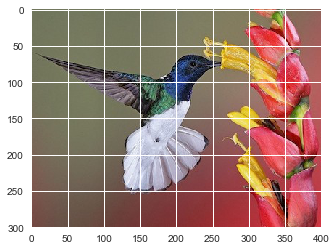

In [144]:
%matplotlib inline
from skimage.io import imread
from skimage import data, color, io, exposure, img_as_float
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import time

np.random.seed(seed=42)


img = imread("../Data/bird.jpg")
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [125]:
#print(img)
img=img_as_float(img)
print(img.shape)
print(img)

(300, 400, 3)
[[[ 0.43529412  0.45882353  0.35686275]
  [ 0.43529412  0.45882353  0.35686275]
  [ 0.43529412  0.45882353  0.35686275]
  ..., 
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56862745  0.38431373  0.35294118]]

 [[ 0.43529412  0.45882353  0.35686275]
  [ 0.43529412  0.45882353  0.35686275]
  [ 0.43921569  0.4627451   0.36078431]
  ..., 
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56862745  0.38431373  0.35294118]
  [ 0.56862745  0.38431373  0.35294118]]

 [[ 0.43921569  0.4627451   0.36078431]
  [ 0.43921569  0.4627451   0.36078431]
  [ 0.43921569  0.4627451   0.36078431]
  ..., 
  [ 0.56078431  0.38823529  0.35294118]
  [ 0.56470588  0.38039216  0.34901961]
  [ 0.56470588  0.38039216  0.34901961]]

 ..., 
 [[ 0.45098039  0.2745098   0.25490196]
  [ 0.45098039  0.2745098   0.25490196]
  [ 0.44705882  0.27843137  0.25490196]
  ..., 
  [ 0.82352941  0.21176471  0.26666667]
  [ 0.79607843  0.18823529  0.25098039]
  [ 0.81568627  0.207

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [140]:
newimg.ravel()
newimg=np.vstack(img)
print(newimg.shape)
print(newimg)

(120000, 3)
[[ 0.43529412  0.45882353  0.35686275]
 [ 0.43529412  0.45882353  0.35686275]
 [ 0.43529412  0.45882353  0.35686275]
 ..., 
 [ 0.81176471  0.2         0.25490196]
 [ 0.80392157  0.19607843  0.25882353]
 [ 0.79607843  0.19607843  0.26666667]]


### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [160]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=8)
%time{clf.fit(newimg)}

Wall time: 0 ns


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [182]:
lab=clf.labels_#находим номера кластеров
cen=clf.cluster_centers_#находим центры кластеров
clustered_image=newimg
for i in range(8):
    clustered_image[lab==i]=cen[i]#заменяем цвета пикселов на цвет центра кластера

### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

In [ ]:
#Не могу понять смысл задания: что должно быть нарисовано и как сделать "естественный" reshape 2-мерного в 3-мерный массив

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

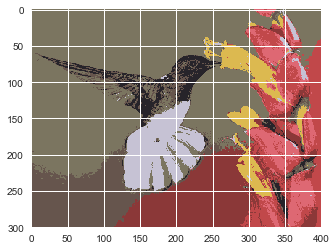

In [181]:
clustered_image=clustered_image.reshape(300, 400, 3)
plt.imshow(clustered_image)

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 жлементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [11]:
df = pd.read_csv('../Data/checkins_.csv')
df.head()

,latitude,longitude
0,38.895112,-77.036366
1,33.800745,-84.410520
2,45.523452,-122.676207
3,40.764462,-111.904565
4,33.448377,-112.074037


In [12]:
df.describe()

,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [110]:
from sklearn.cluster import MeanShift, estimate_bandwidth
ms = MeanShift(bandwidth=0.1, bin_seeding=True)
ms.fit(df)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3092


### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.


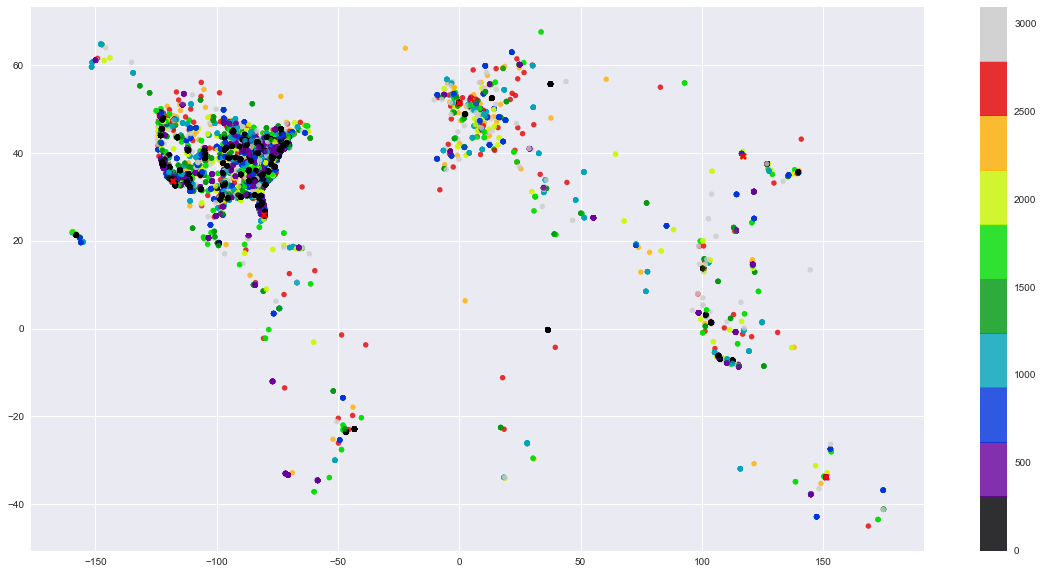

In [120]:
offices=np.array([33.751277, -118.188740,
25.867736, -80.324116,
51.503016, -0.075479,
52.378894, 4.885084,
39.366487, 117.036146,
-33.868457, 151.205134])
offices=offices.reshape(6,2)
plt.figure(figsize=(20,10))
plt.scatter(df.values[:,1], df.values[:,0], c=labels, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30,)
plt.colorbar()
plt.plot(offices[:,1], offices[:,0], 'rX', label='office')


#plt.plot(df.values[labels == 0, 1], df.values[labels == 0, 0], 'bo', label='cluster #1')
#plt.plot(df.values[labels == 1, 1], df.values[labels == 1, 0], 'co', label='cluster #2')
#plt.plot(df.values[labels == 2, 1], df.values[labels == 2, 0], 'mo', label='cluster #3')

#plt.legend(loc=0)

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [112]:
good_clusters=np.zeros(n_clusters_,dtype=bool)
for i in labels_unique:
    good_clusters[i]=(df[labels==i].shape[0]>15)
good_cluster_centers=cluster_centers[good_clusters,]
print(good_clusters.shape)


(3092,)


###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [113]:
from scipy.spatial.distance import cdist
distances = cdist(offices, good_cluster_centers)
min_dist=distances.min(axis=0)
#print(min_dist.argsort()[:2])
print(good_cluster_centers[min_dist.argsort()[:20]])
#второй парой в списке была наййдена пара из ответа внизу ))))))))))

[[ -3.38606304e+01   1.51204776e+02]
 [  5.23729640e+01   4.89231722e+00]
 [  2.58830504e+01  -8.03078258e+01]
 [  5.15029913e+01  -1.25537289e-01]
 [  3.38098780e+01  -1.18148924e+02]
 [  2.57858124e+01  -8.02179380e+01]
 [  2.57053497e+01  -8.02834287e+01]
 [  3.39318358e+01  -1.18141898e+02]
 [  2.60100982e+01  -8.01999906e+01]
 [  3.38883253e+01  -1.18048928e+02]
 [  3.38729860e+01  -1.18362091e+02]
 [  2.61162002e+01  -8.03937907e+01]
 [  3.36432049e+01  -1.17946115e+02]
 [  2.61208627e+01  -8.01589067e+01]
 [  3.38112331e+01  -1.17890612e+02]
 [  3.40603976e+01  -1.18248709e+02]
 [  2.62005846e+01  -8.02507161e+01]
 [  3.37317442e+01  -1.17825700e+02]
 [  3.40354870e+01  -1.18438998e+02]
 [  3.41380093e+01  -1.18168987e+02]]


Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 